Author: Jared Wilson
Date: 4/15/19

# Dimensionality Reduction: LDA, SVM, & PCA Comparison

### The curse of dimensionality 

As we increase the number of dimensions or variables in a problem, the sparsity of the set increases. This means it will become more difficult to figure out trends. 

"The simplest possible illustrative example is in just one to two dimensions. Suppose we have two points on a line, 0 and 1. These two points are unit distance away from one another. Suppose we introduce a second axis of "data", again distributed a unit distance away. Now we have two points,  (0,0)  and  (1,1) . But the distance between the points has grown to  2–√ !"

https://www.kaggle.com/residentmario/curse-of-dimensionality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pandas.plotting import scatter_matrix


#plt.style.use('fivethirtyeight')


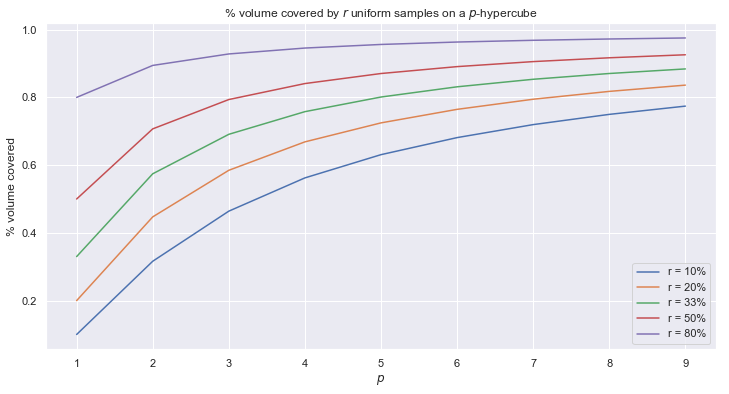

In [2]:
plt.figure(figsize=(12, 6))
plt.title(
    "% volume covered by $r$ uniform samples on a $p$-hypercube"
)
plt.xlabel('$p$')
plt.ylabel('% volume covered')

plt.plot(range(1, 10), [0.1**(1/n) for n in range(1, 10)], label="r = 10%")
plt.plot(range(1, 10), [0.2**(1/n) for n in range(1, 10)], label="r = 20%")
plt.plot(range(1, 10), [0.33**(1/n) for n in range(1, 10)], label="r = 33%")
plt.plot(range(1, 10), [0.5**(1/n) for n in range(1, 10)], label="r = 50%")
plt.plot(range(1, 10), [0.8**(1/n) for n in range(1, 10)], label="r = 80%")
plt.legend()

This plot shows the overall volume of the cube covered when looking at a chosen percentage of data. When looking at a random point in the hypercube, the volume covered is the relative distance travelled in order to encompass X% of the data. For example, in a two dimensional hypercube, one would need to travel about ~30% of the overall cube's volume in order to capture 10% of the overall data. 

When we do dimensionality reduction, we're trying to avoid the problems that come with high dimensionality. 

## Data

For the comparison of PCA, LDA, and SVM I decided to use the iris dataset. It contains three different types of flowers and some accompanying measures: sepal length, sepal width, petal length, and petal width. I chose it because it has four dimensions and is easily reducable. The easiness of the dataset aligns well with my incompentency as a data scientist and helps explain the mechanisms of dimensionality reduction. 

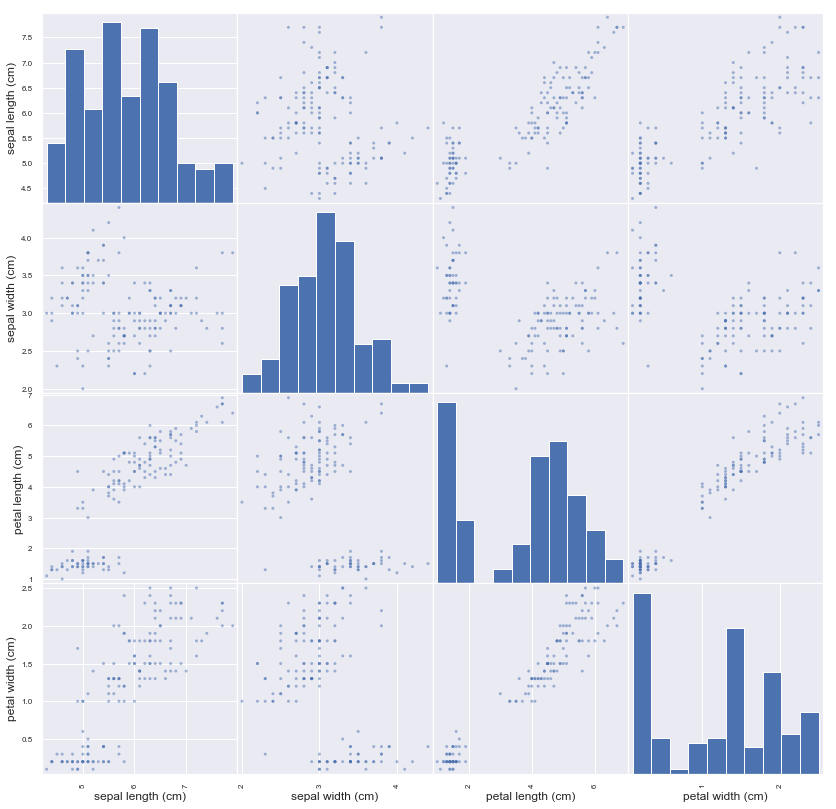

In [3]:
iris = datasets.load_iris()

Xi = iris.data
yi = iris.target
target_names = iris.target_names

data1 = pd.DataFrame(data= np.c_[iris['data']], columns= iris['feature_names'])

scatter_matrix(data1, figsize = [14,14])
plt.show()

## Principal Component Analysis (PCA)

The Principal Component Analysis attempts to transform data into a low dimension subspace. The first principal component is the direction on which the data varies the most. It is considered 'unsupervised' because it ignores class labels. 

To demonstrate this I generate some random data and run principal component analysis on it. The first graph is the unmodified data. The largest arrow is the first principal component; it's the axis on which the data varies the most. The second principal component is the next-highest variation axis perpendicular to the first. Because we're working in two dimensions, there's only one option. 

This is a bad example for this notebook because it's not actually reducing dimensionality. 

In [4]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[(-3, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5, 5),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

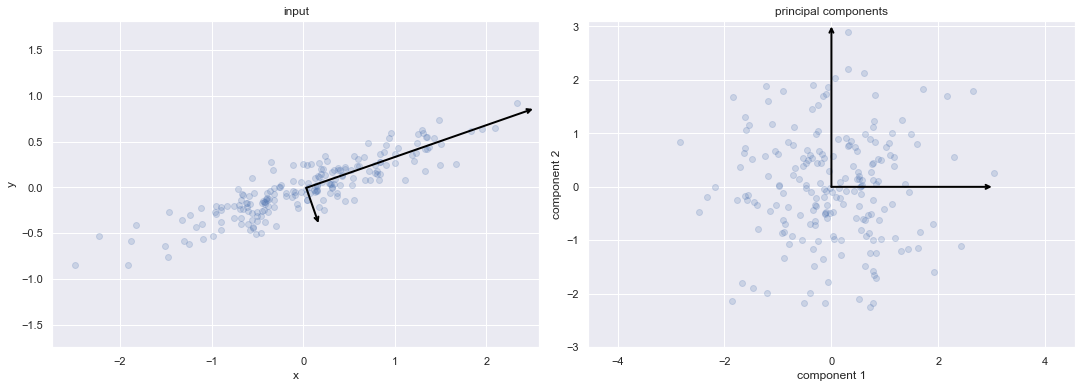

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, -pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

The total variance is the sum of variances of all individual principal components.

The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance

In this example, the first PC explains 97.6% of the variation in the dataset, while the second PC explains 2.3%. Because we're not reducing any dimensions, the total PCA explained variance ratio is 100% (equal to total variance). 

Typically, a data scientist will choose an amount of principal components that explains a good amount of variance (95-99%) of the data, while still reducing its dimensions. 

In [6]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.97634101 0.02365899]
0.9999999999999999


### PCA on the iris dataset

explained variance ratio (first two components, PCA): [0.92461872 0.05306648]


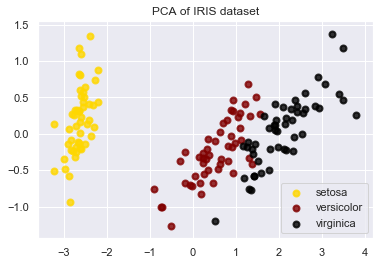

In [7]:
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(Xi).transform(Xi)

# Percentage of variance explained for each components
print('explained variance ratio (first two components, PCA): %s'
      % str(pca.explained_variance_ratio_))


plt.figure()
colors = ['gold', 'maroon', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[yi == i, 0], X_r[yi == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()

### LDA

LDA is similar to PCA; as dimensionality reduction techniques they attempt to project data onto a lower-dimension space. LDA also attempts to maximise the seperation between multiple classes. LDA is consiered a supervised learning method, because it takes into account the labels column. 

### LDA Dimensionality reduction on Iris dataset

This is a bit subjective, but LDA performs a bit better here as the first principal component explains almost all of the data. LDA seperates the classes a bit better, which is unsurprising as one of LDA's cornerstones is maximising class seperation. 

explained variance ratio (first two components, LDA): [0.9912126 0.0087874]


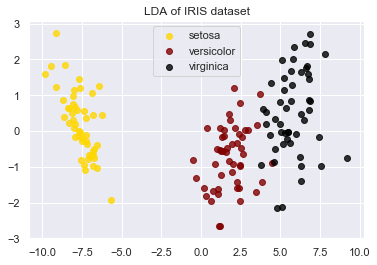

In [8]:
target_names = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(Xi, yi).transform(Xi)
print('explained variance ratio (first two components, LDA): %s'
      % str(lda.explained_variance_ratio_))


plt.figure()
colors = ['gold', 'maroon', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[yi == i, 0], X_r2[yi == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

## Support Vector Machine (SVM) 

SVM is interesting, because it's typcally used as a classifier. SVM takes data and attempts to find the hyperplane which seperates classes by the most. WHen performing non-linear classification, SVMs map data into higher-dimension feature spaces. They're usually effective for high dimension, low sample data. 

In [9]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(Xi, yi)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(Xi)
X_new.shape


(150, 3)

#### SVM for iris dataset

The easiest way I could think of to make a feature selector based on support vector machines is simply use them as a classifier, then select the moidel that is the most successful while using the least amount of classes. We use SelectFromModel in order to grab the model that is the most successful. 

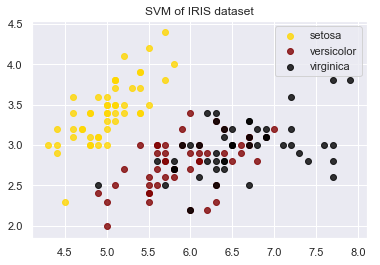

In [10]:
plt.figure()
colors = ['gold', 'maroon', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_new[yi == i, 0], X_new[yi == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('SVM of IRIS dataset')

plt.show()

# Conclusion 

Principal component analysis is an unsupervised feature selection method which attempts to find the axis on which the data varies the most, and plot it on that axis. 

Linear Discriminant Analysis is typically used as a supervised learning method to reduce dimensionality. It attempts to minimize within-class variation, while maximising out-of class variation.

Support Vector Machines attempt to find the widest hyperplane between classes, or map data into a higher-dimension subspace and do the same thing. 